In [1]:
import sys,os,time,cv2
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

from th_utils import *
from utils import imread_to_rgb, crop_img, emo2txt
import matplotlib.pyplot as plt


In [5]:
class Friends_dataset(Dataset):
    def __init__(self, af_dict, ops):
        self.ops = ops
        self.af_dict = af_dict
        self.len = 13369
    
    def __len__(self):
        return self.len
        
    def __getitem__(self, idx):
        ops = self.ops
        af_dict = self.af_dict
        
        # randomly choose emotion - wrt neutral probability
        rndv = th_rand()
        if rndv < ops.neutral_ratio:
            # neutral
            emo = 6
        else:
            # non neutral, choose again from 0~5
            emo = th_randint(0, 6)
        
        # label vec
        batch_emo = np.zeros(7)
        batch_emo[emo] = 1
        
        # randomly choose image sample and import
        rndi = th_randint(len(af_dict[emo]))
        sel_dict = af_dict[emo][rndi]
        img = imread_to_rgb(ops.friends_path + sel_dict['img'])
        batch_img = img
        
        # returns
        batch_img = torch.Tensor( batch_img.transpose(2,0,1).copy() )
        batch_emo = torch.Tensor( batch_emo.copy() )
        
        return batch_img, batch_emo
    
    

In [6]:
import ops
fr_dict = np.load('../../dicts/friends_parsed.npy', allow_pickle=True).item()
fr_dataset = Friends_dataset(fr_dict, ops)
fr_loader = DataLoader(dataset=fr_dataset, batch_size=ops.batch_size, num_workers=4)


In [9]:
for i, bat in enumerate(fr_loader, 0):
    img, emo = bat[0], bat[1]
    break


sadness


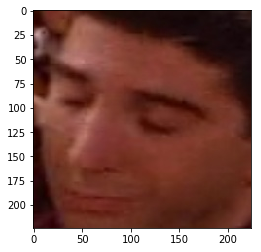

In [16]:
idx = 7
img_np = img.permute(0,2,3,1).numpy()
plt.imshow(img_np[idx])
print emo2txt(emo[idx].nonzero()[0][0])